In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor

from useful_functions import load_transform_split, scatter_resid, scatter_predvreal, plot_performance

from RandomSeedSearchCV import RandomSeedSearchCV

#### Load data, clean, split into training/testing, etc.

In [2]:
X_train,X_test,y_train,y_test,pipeline = load_transform_split(target='DROPOUT_N',
                                                              expand=False,
                                                              clean=True,
                                                              split=0.2,
                                                              return_pipeline=True,
                                                              fmt='numpy',
                                                              random_state=24)
print(X_train.shape,X_test.shape)

(57656, 19) (14414, 19)


#### Try a test neural net.

In [3]:
model = keras.models.Sequential([
    keras.layers.Dense(20,activation='tanh',input_shape=[X_train.shape[1]]),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='relu'),
])
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights = np.abs(X_train[:,0])
weights /= np.max(weights)
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2,sample_weight=weights)
print("Training MSE: %.2f, Testing MSE: %.2f"%(
      mean_squared_error(model.predict(X_train),y_train),
      mean_squared_error(model.predict(X_test),y_test)))

Train on 46124 samples, validate on 11532 samples
Epoch 1/10
46124/46124 [==============================] - 9s 196us/sample - loss: 1.0083 - val_loss: 87672526.8162
Epoch 2/10
46124/46124 [==============================] - 11s 231us/sample - loss: 1.0083 - val_loss: 87672526.8162
Epoch 3/10
46124/46124 [==============================] - 12s 261us/sample - loss: 1.0083 - val_loss: 87672526.8162
Epoch 4/10
32128/46124 [===================>..........] - ETA: 2s - loss: 0.9045

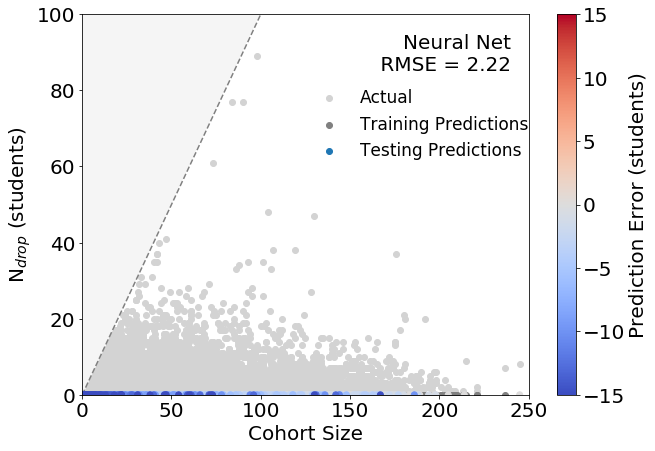

In [15]:
ax = plot_performance(model,'Neural Net',X_train,X_test,y_train,y_test)
ax.figure.savefig('figures/weighted_neuralnet_attempt1_summary.png',dpi=450)

In [17]:
print(X_test.shape,y_test.shape,model.predict(X_test).shape)

(14414, 19) (14414, 1) (14414, 1)


In [ ]:
def randomseed_neuralnet_maker(seed,**kwargs):
    # Default Parameters!
    params = {
              'nhidden_lo':2,
              'nhidden_hi':5,
              'nhidden':   None,
        
              'activation_opts':['tanh',]
    }